In [1]:
#Import packages for analysis and modeling 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

#Linear Regression
from sklearn.linear_model import LinearRegression

In [2]:
#Load data from csv file 

housing_df = pd.read_csv('housing.csv')

In [3]:
#Check the first 5 rows of the data
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
#check for the info of the data and other structural details of the data 

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#check for missing values in the data

housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
#There are missing values in the total_bedrooms column. We will fill the missing values with the median value of the column

housing_df["total_bedrooms"].fillna(housing_df["total_bedrooms"].median(), inplace=True)

In [7]:
#check for missing values in the data to be sure that there are no missing values in the data anymore
housing_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [8]:
X = housing_df.drop('median_house_value', axis=1)
y = housing_df['median_house_value']

In [9]:
#Split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
train_data = X_train.join(y_train)

In [11]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9596,-120.45,37.31,20.0,4379.0,753.0,2055.0,716.0,3.7652,INLAND,133500.0
14747,-117.05,32.58,23.0,1918.0,339.0,1392.0,340.0,4.0870,NEAR OCEAN,134800.0
17474,-119.89,34.44,25.0,2786.0,470.0,1669.0,462.0,5.5184,NEAR OCEAN,268300.0
15054,-116.83,32.81,18.0,2367.0,402.0,1021.0,395.0,4.8125,<1H OCEAN,210500.0
9256,-120.05,36.96,37.0,1000.0,261.0,1092.0,233.0,1.4267,INLAND,52300.0
...,...,...,...,...,...,...,...,...,...,...
13886,-115.75,35.23,5.0,208.0,78.0,132.0,56.0,2.5333,INLAND,75000.0
16837,-122.48,37.59,29.0,5889.0,959.0,2784.0,923.0,5.3991,NEAR OCEAN,273000.0
16055,-122.49,37.76,52.0,1382.0,230.0,708.0,279.0,5.8096,NEAR BAY,339800.0
15947,-122.43,37.72,52.0,3351.0,719.0,2101.0,706.0,3.0107,NEAR BAY,242000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

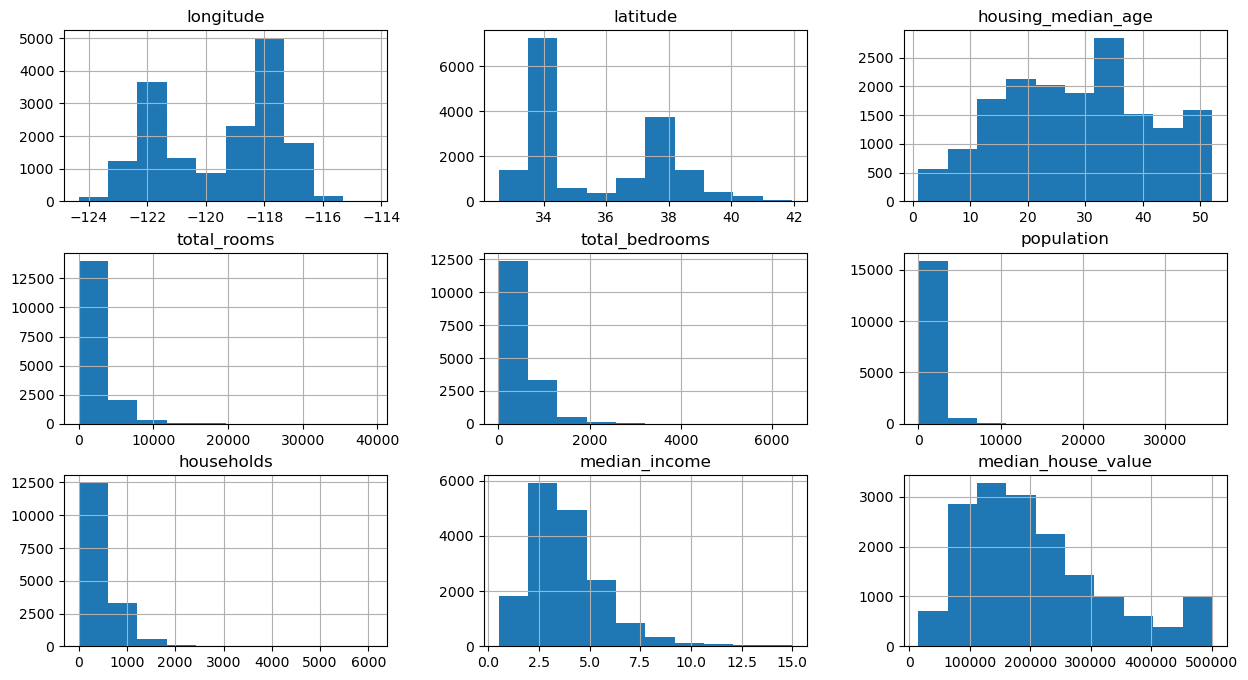

In [12]:
train_data.hist(figsize=(15,8))

/var/folders/5g/9wz_g5jn76g_3jvq2z1336zr0000gp/T/ipykernel_77912/4030865306.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')


<Axes: >

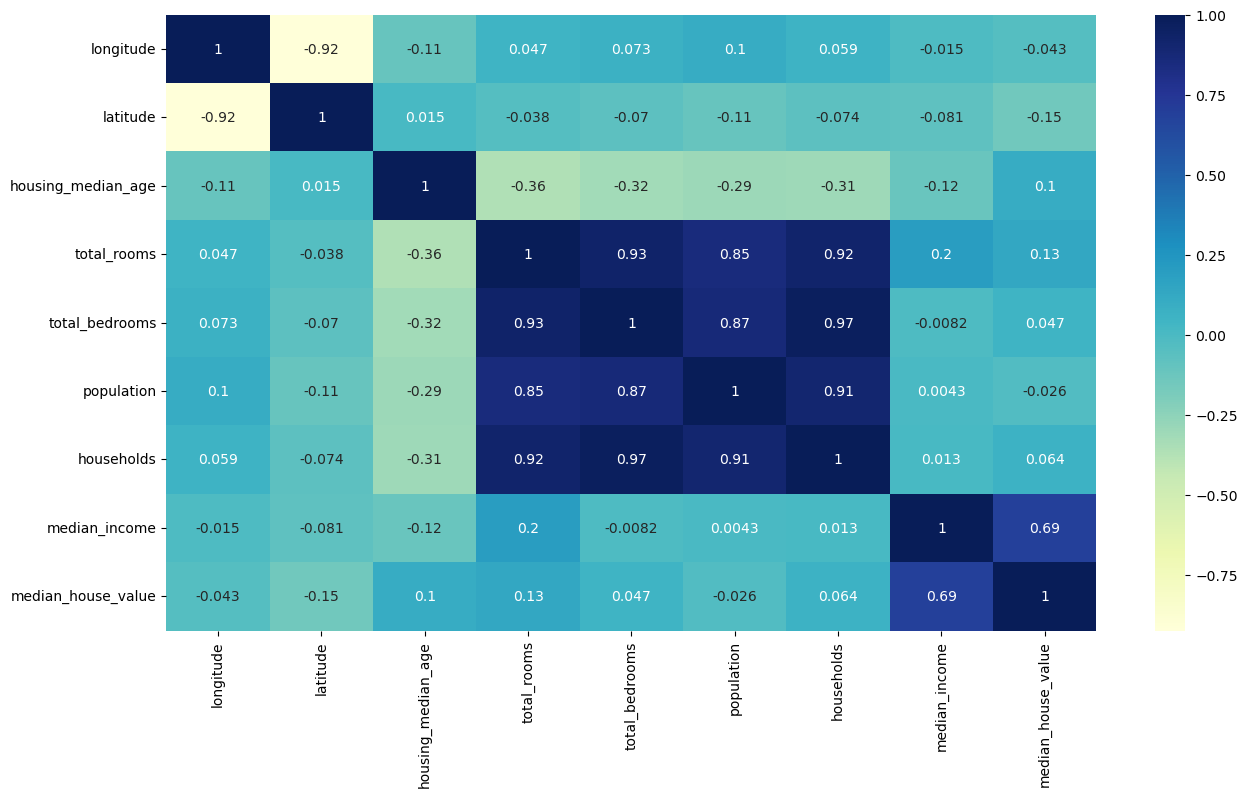

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [14]:
#If we some of the columns in the data, we can see that the data is skewed. We will use log transformation to reduce the skewness in the data, 
#and make the data more normally distributed

train_data['total_rooms'] = np.log(train_data['total_rooms'])
train_data['population'] = np.log(train_data['population'])
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'])
train_data['households'] = np.log(train_data['households'])


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

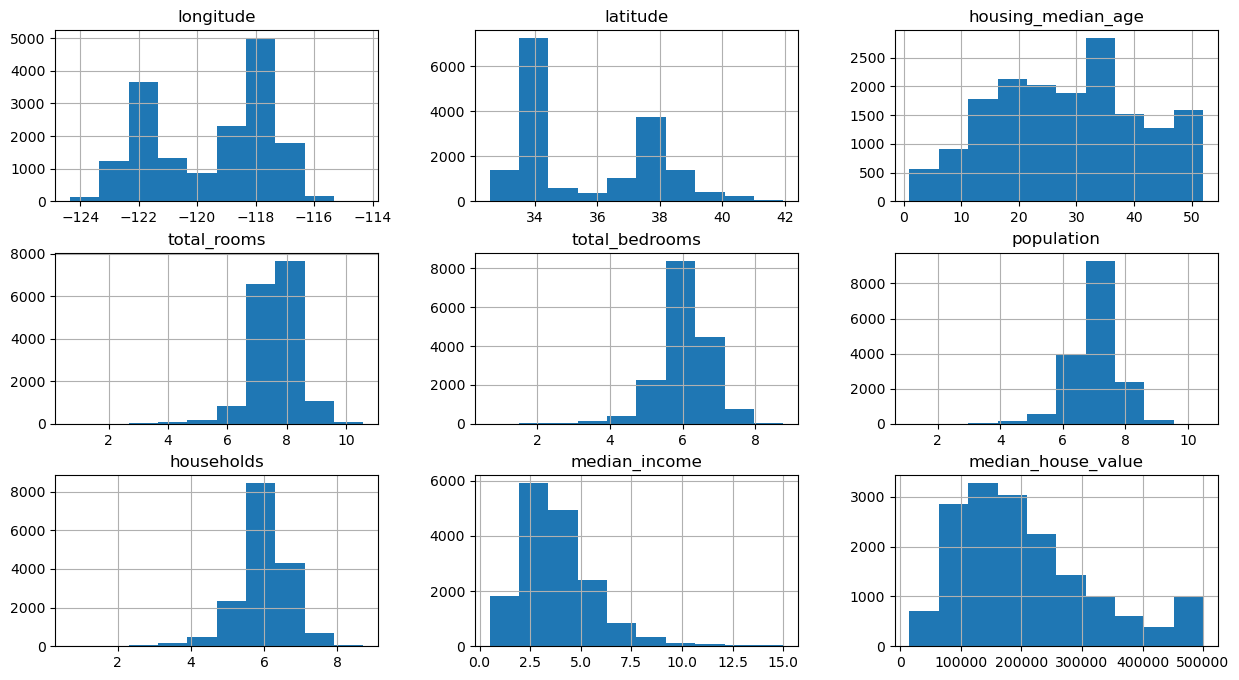

In [15]:
train_data.hist(figsize=(15,8))

In [16]:
#checking the distribution of the data in the ocean_proximity column, we need to convert the categorical data to numerical data

train_data.ocean_proximity.value_counts()

<1H OCEAN     7373
INLAND        5234
NEAR OCEAN    2101
NEAR BAY      1801
ISLAND           3
Name: ocean_proximity, dtype: int64

In [17]:
#Using the pandas get_dummies function, we will convert the categorical data to numerical data

train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [18]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9596,-120.45,37.31,20.0,8.384576,6.624065,7.628031,6.573680,3.7652,133500.0,0,1,0,0,0
14747,-117.05,32.58,23.0,7.559038,5.826000,7.238497,5.828946,4.0870,134800.0,0,0,0,0,1
17474,-119.89,34.44,25.0,7.932362,6.152733,7.419980,6.135565,5.5184,268300.0,0,0,0,0,1
15054,-116.83,32.81,18.0,7.769379,5.996452,6.928538,5.978886,4.8125,210500.0,1,0,0,0,0
9256,-120.05,36.96,37.0,6.907755,5.564520,6.995766,5.451038,1.4267,52300.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13886,-115.75,35.23,5.0,5.337538,4.356709,4.882802,4.025352,2.5333,75000.0,0,1,0,0,0
16837,-122.48,37.59,29.0,8.680841,6.865891,7.931644,6.827629,5.3991,273000.0,0,0,0,0,1
16055,-122.49,37.76,52.0,7.231287,5.438079,6.562444,5.631212,5.8096,339800.0,0,0,0,1,0
15947,-122.43,37.72,52.0,8.117014,6.577861,7.650169,6.559615,3.0107,242000.0,0,0,0,1,0


<Axes: >

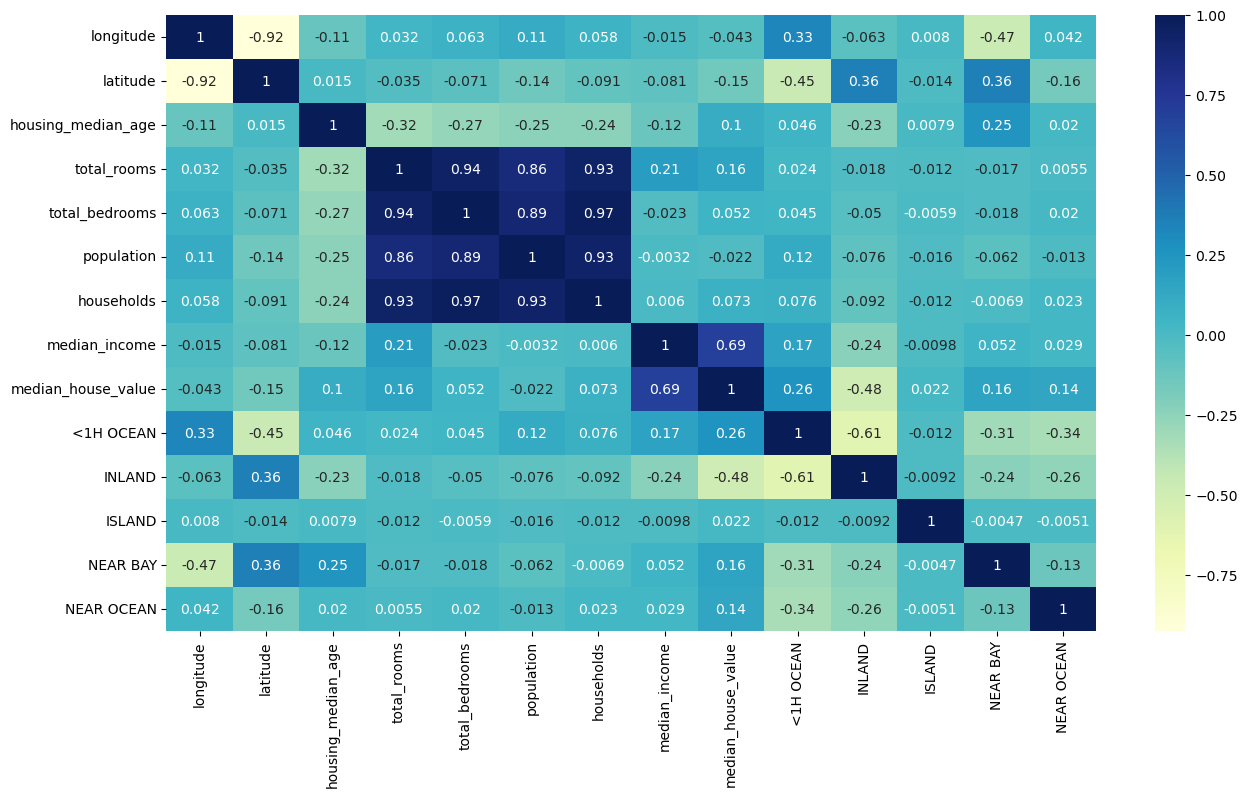

In [19]:
#Let's check the correlation of the data again, to see if there are any changes because of the new columns we added

plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

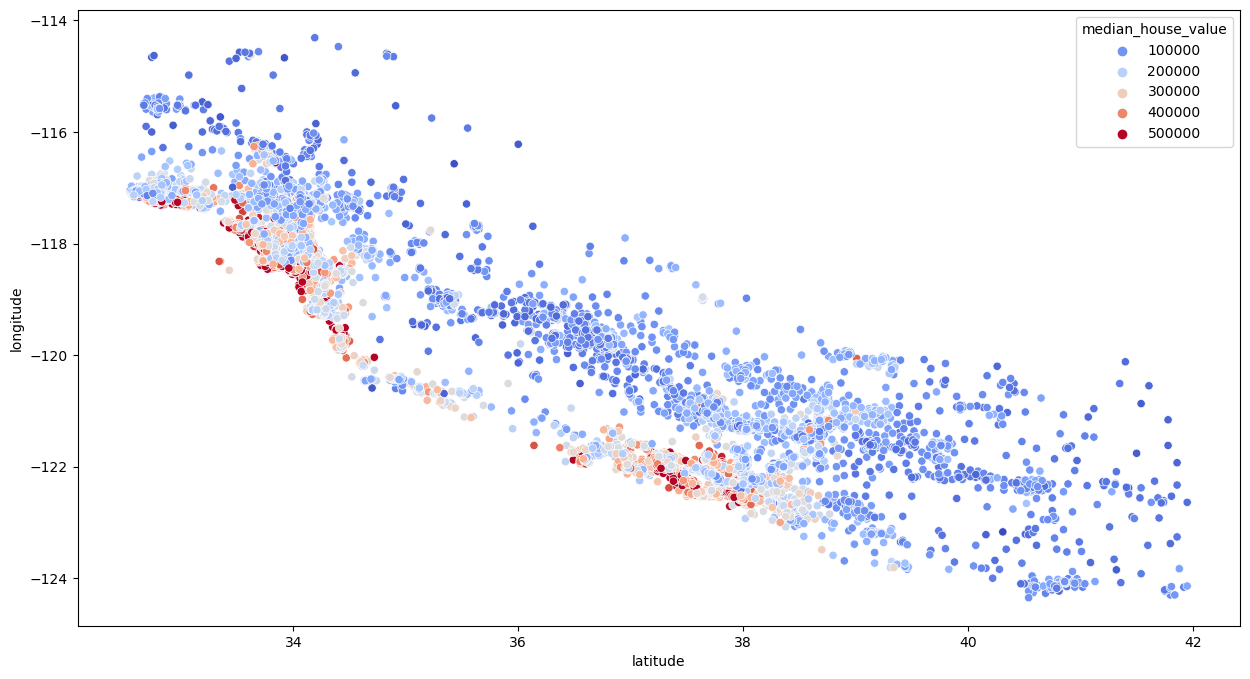

In [20]:
#We new have a scatter plot of the data, to see the relationship between the median_house_value and the other columns in the data

plt.figure(figsize=(15,8))

sns.scatterplot(x="latitude", y="longitude", hue="median_house_value", data=train_data, palette='coolwarm')

The more expensive the houses are, the red the become, and the cheaper the houses are, the bluer they become

#### Feature Engineering

In [21]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<Axes: >

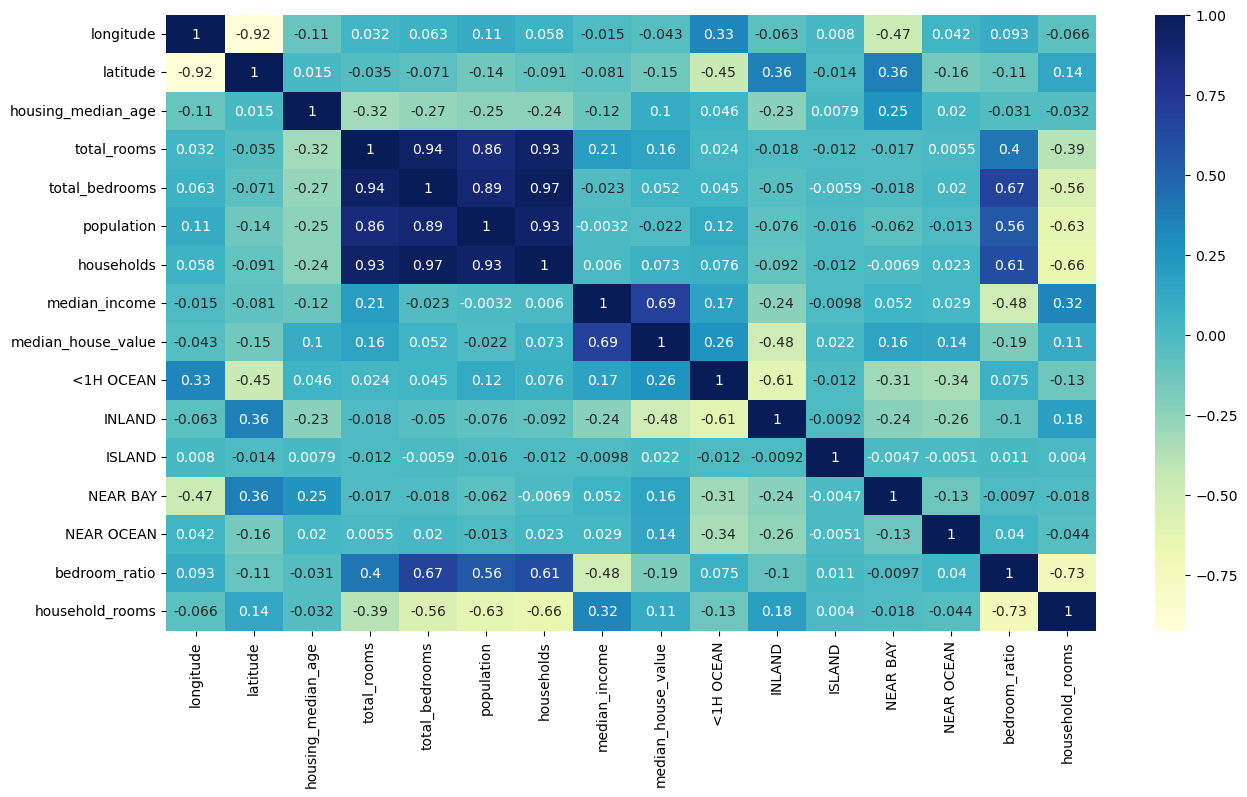

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [23]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
9596,-120.45,37.31,20.0,8.384576,6.624065,7.628031,6.573680,3.7652,133500.0,0,1,0,0,0,0.790030,1.275477
14747,-117.05,32.58,23.0,7.559038,5.826000,7.238497,5.828946,4.0870,134800.0,0,0,0,0,1,0.770733,1.296811
17474,-119.89,34.44,25.0,7.932362,6.152733,7.419980,6.135565,5.5184,268300.0,0,0,0,0,1,0.775649,1.292850
15054,-116.83,32.81,18.0,7.769379,5.996452,6.928538,5.978886,4.8125,210500.0,1,0,0,0,0,0.771806,1.299469
9256,-120.05,36.96,37.0,6.907755,5.564520,6.995766,5.451038,1.4267,52300.0,0,1,0,0,0,0.805547,1.267237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13886,-115.75,35.23,5.0,5.337538,4.356709,4.882802,4.025352,2.5333,75000.0,0,1,0,0,0,0.816239,1.325981
16837,-122.48,37.59,29.0,8.680841,6.865891,7.931644,6.827629,5.3991,273000.0,0,0,0,0,1,0.790925,1.271428
16055,-122.49,37.76,52.0,7.231287,5.438079,6.562444,5.631212,5.8096,339800.0,0,0,0,1,0,0.752021,1.284144
15947,-122.43,37.72,52.0,8.117014,6.577861,7.650169,6.559615,3.0107,242000.0,0,0,0,1,0,0.810379,1.237422


In [24]:
#implementing the linear regression model
reg = LinearRegression()

In [25]:
X_train, y_train = train_data.drop('median_house_value', axis=1), train_data['median_house_value']

In [26]:
reg.fit(X_train, y_train)

LinearRegression()

In [27]:
test_data = X_test.join(y_test)


test_data['total_rooms'] = np.log(test_data['total_rooms'])
test_data['population'] = np.log(test_data['population'])
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'])
test_data['households'] = np.log(test_data['households'])

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)



test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']


In [28]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [30]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
14932,-116.99,32.64,15.0,8.373554,6.549651,7.623642,6.440947,3.9519,0,0,0,0,1,0.782183,1.300050
14245,-117.10,32.70,42.0,7.601902,6.190315,7.316548,6.139885,1.5057,0,0,0,0,1,0.814311,1.238118
9965,-122.48,38.48,29.0,7.731053,5.983936,6.639876,5.774552,4.6379,0,1,0,0,0,0.774013,1.338814
2844,-118.98,35.41,36.0,7.301148,5.583496,6.461468,5.613128,3.8750,0,1,0,0,0,0.764742,1.300727
3355,-120.57,40.43,15.0,7.623153,6.133398,7.021976,5.996452,2.6902,0,1,0,0,0,0.804575,1.271277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14737,-117.05,32.82,16.0,8.305484,6.594413,7.428927,6.552508,4.2312,1,0,0,0,0,0.793983,1.267528
15885,-122.40,37.74,45.0,7.808729,6.232448,7.369601,6.109248,2.5900,0,0,0,1,0,0.798139,1.278182
6371,-118.00,34.15,48.0,8.142063,6.511745,7.339538,6.473891,4.2750,0,1,0,0,0,0.799766,1.257677
8488,-118.31,33.90,28.0,7.362645,5.991465,6.792344,5.934894,2.6312,1,0,0,0,0,0.813765,1.240569
